Determinar $\int_1^7{\frac{1}{x}} \ \ dx$

Compare, graficamente o valor exato com aquele obtido no item anterior

Desenvolva uma estratégia computacional para melhorar e avaliar os resultados obtidos

In [6]:
def f(x):
  return 1/x

def SimpleNumericIntegration(func, x_ini, x_fin):
  return ((func(x_ini) + func(x_fin)) / 2) * (x_fin - x_ini)

print(SimpleNumericIntegration(f, 1, 7))

3.4285714285714284


Valor Exato (ln(7)): 1.9459
Valor Aproximado (Regra do Trapézio): 3.4286


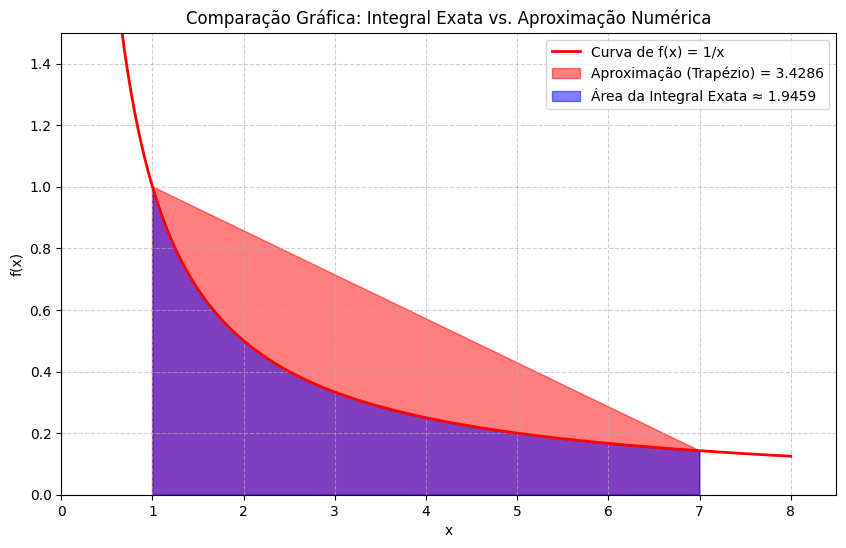

In [40]:
import numpy as np
import matplotlib.pyplot as plt

x_inicial = 1
x_final = 7

valor_exato = np.log(x_final) - np.log(x_inicial)

valor_aproximado = SimpleNumericIntegration(f, x_inicial, x_final)

print(f"Valor Exato (ln(7)): {valor_exato:.4f}")
print(f"Valor Aproximado (Regra do Trapézio): {valor_aproximado:.4f}")

x_curva = np.linspace(0.5, 8, 400)
y_curva = f(x_curva)

plt.figure(figsize=(10, 6))

plt.plot(x_curva, y_curva, 'r', linewidth=2, label='Curva de f(x) = 1/x')

pontos_x_trapezio = [x_inicial, x_final, x_final, x_inicial]
pontos_y_trapezio = [f(x_inicial), f(x_final), 0, 0]
plt.fill(pontos_x_trapezio, pontos_y_trapezio, edgecolor='red', facecolor='red', alpha=0.5, label=f'Aproximação (Trapézio) = {valor_aproximado:.4f}')

x_area_exata = np.linspace(x_inicial, x_final, 100)
y_area_exata = f(x_area_exata)
plt.fill_between(x_area_exata, y_area_exata, color='blue', alpha=0.5, label=f'Área da Integral Exata ≈ {valor_exato:.4f}')

plt.title('Comparação Gráfica: Integral Exata vs. Aproximação Numérica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.xlim(0, 8.5)
plt.ylim(0, 1.5)

plt.show()

Para melhorar o resultado podemos aumentar a quantidade de pontos que utilizaremos na função

In [22]:
def NumericIntegration(func, x_ini, x_fin, n_points=100_000):
  points = np.linspace(x_ini, x_fin, n_points)
  return np.sum(func(points[1:-1])) * (x_fin - x_ini) / (n_points - 1)

print(NumericIntegration(f, 1, 7))

1.9458758632920505


Determine $\int e^x\sin(10x)+8 \ \ dx$

In [23]:
def g(x):
  return np.e**x * np.sin(10*x) + 8

print(SimpleNumericIntegration(g, 0.4, 2))
print(NumericIntegration(g, 0.4, 2))

17.29342961531347
12.482700242013122


Valor Exato da Integral: 12.4829
Valor Aproximado (Regra do Trapézio): 17.2934


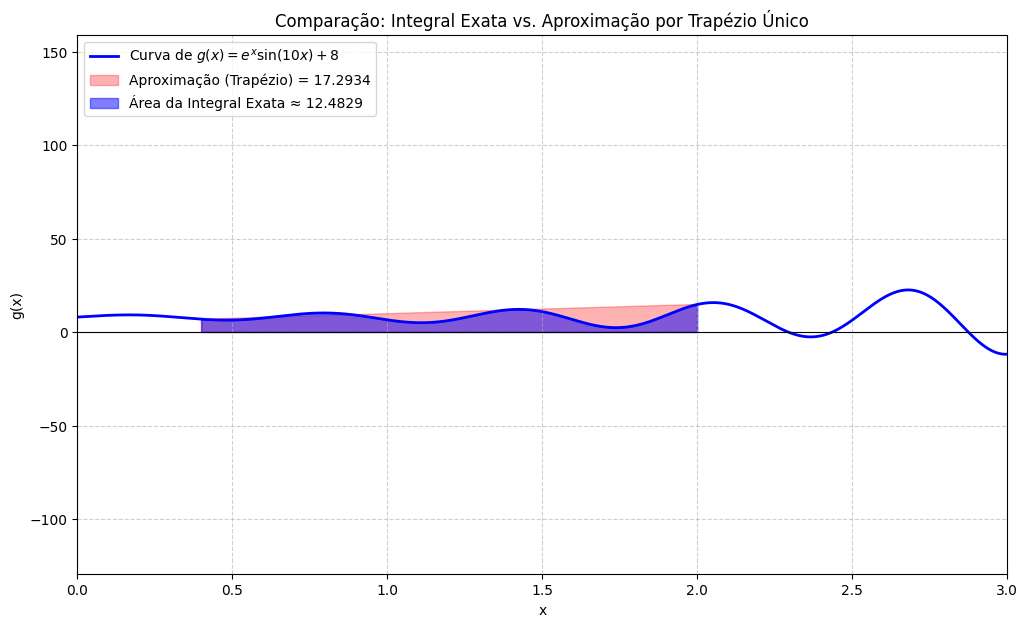

In [39]:
def antiderivada_g(x):
  return (np.e**x / 101) * (np.sin(10*x) - 10 * np.cos(10*x)) + 8 * x
x_inicial = 0.4
x_final = 2

valor_exato = antiderivada_g(x_final) - antiderivada_g(x_inicial)

valor_aproximado = SimpleNumericIntegration(g, x_inicial, x_final)

print(f"Valor Exato da Integral: {valor_exato:.4f}")
print(f"Valor Aproximado (Regra do Trapézio): {valor_aproximado:.4f}")

x_curva = np.linspace(0, 4, 100_000)
y_curva = g(x_curva)

plt.figure(figsize=(12, 7))

plt.plot(x_curva, y_curva, 'b', linewidth=2, label='Curva de $g(x) = e^x \sin(10x) + 8$')

pontos_x_trapezio = [x_inicial, x_final, x_final, x_inicial]
pontos_y_trapezio = [g(x_inicial), g(x_final), 0, 0]
plt.fill(pontos_x_trapezio, pontos_y_trapezio, edgecolor='red', facecolor='red', alpha=0.3,
         label=f'Aproximação (Trapézio) = {valor_aproximado:.4f}')

x_area_exata = np.linspace(x_inicial, x_final, 500)
y_area_exata = g(x_area_exata)
plt.fill_between(x_area_exata, y_area_exata, color='blue', alpha=0.5,
                 label=f'Área da Integral Exata ≈ {valor_exato:.4f}')

plt.title('Comparação: Integral Exata vs. Aproximação por Trapézio Único')
plt.xlabel('x')
plt.ylabel('g(x)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='upper left')

min_val = min(y_curva)
max_val = max(y_curva)
plt.xlim(0, 3)
plt.ylim(min_val - 100, max_val + 100)

plt.axhline(0, color='black', linewidth=0.8)

plt.show()

Determine $\int_1^4 \ln(x^3+\sqrt{e^x+1})  \ \ dx$

In [41]:
def h(x):
  return np.log(x**3 + np.sqrt(np.e**x+1))

print(SimpleNumericIntegration(h, 1, 4))
print(NumericIntegration(h, 1, 4))

8.015256790900294
8.561529327571911


Determine $\int_0^{2,7} \frac{x+ \sin(x)}{1 + \cos(x)} \ \ dx$

In [42]:
def i(x):
  return (x + np.sin(x)) / (1 + np.cos(x))

print(SimpleNumericIntegration(i, 0, 2.7))
print(NumericIntegration(i, 0, 2.7))

44.01185356465029
12.028658636706323
